# " Heart failure Project "

#  - Idea :

In [1]:
# Idea is according to the dataset features of heart failure,
# We can create a model for predicting mortality caused by Heart Failure.
# We can make use of it to take procedures to keep people in good health.

# - Libraries to work with dataset :

In [2]:
import pandas as pd  # Dealing with series and dataframes
import matplotlib.pyplot as plt # To make data_visualization 
from sklearn.preprocessing import MinMaxScaler  # To make Scaling (Normalization)
from sklearn.model_selection import train_test_split  # To split the dataset (train,test)
from sklearn.neighbors import KNeighborsClassifier # classification algorithm_1 
from sklearn.naive_bayes import GaussianNB  # classification algorithm_2
from sklearn import svm  # classification algorithm_3 
import sklearn.metrics as mc # to calculate the accuracy and error ratio of an algorithm  

# - Dataset : 

In [3]:
data = pd.read_csv("heart_failure_records.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


 # - Understanding dataset : 

In [4]:
#information about data:
    # heart_failure: 
        # Heart failure means that the heart is unable to pump blood around the body properly. 
        # Heart failure does not mean your heart has stopped working.
    
    # anaemia: Decrease of red blood cells or hemoglobin (boolean)
    
    # creatine_phosphokinase: Level of the CPK/CK enzyme in the blood (mcg/L)
        # Function: provide cells with Energy (ATP)
        # Normal: 10 to 120 micrograms per liter (mcg/L)
        # Form: (CK-MB) 
    
    # ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
        # if it equal 20 means that 20% of the whole blood is pumped and 80% still in the heart.
    
    # Platelets: Platelets in the blood (kiloplatelets/mL)
        # Normal: From ( 150,000 kiloplatelets/ml ) to ( 450,000 kiloplatelets/ml )  
    
    # serum_creatinine: Level of serum creatinine in the blood (mg/dL)
        # level of creatinine determine if kidney work carefully or not as it should get rid of creatinine
        # heart can't transfer the blood for all the body ( kidney so, it doesn't work well and creatinine increase in the blood )
        # Normal: ( Men:  0.74 to 1.35 mg/dL ) and ( Women: 0.59 to 1.04 mg/dL )
    
    # serum_sodium: Level of serum sodium in the blood (mEq/L)
        # Normal: between 135 and 145 milliequivalents per liter
        # Increase the sodium increase the blood pressure and so leads to heart failure.
    # time: Follow-up period (days)

# - Make data more meaningful, according to what we understood :

In [5]:
data.rename({"creatinine_phosphokinase":"creatinine_phosphokinase_mcg_per_L","ejection_fraction":"ejection_fraction_percentage","platelets":"platelets_kiloplatelets_per_mL","serum_creatinine":"serum_creatinine_mg_per_dL","serum_sodium":"serum_sodium_mEq_per_L","time":"Care_Time_Days"},axis=1,inplace=True)
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


NOTE : According to the idea and data set we will make Supervised machine learning model (Classification algorithms)

# - Dataset has no missing values :

In [6]:
data.isna().sum()

age                                   0
anaemia                               0
creatinine_phosphokinase_mcg_per_L    0
diabetes                              0
ejection_fraction_percentage          0
high_blood_pressure                   0
platelets_kiloplatelets_per_mL        0
serum_creatinine_mg_per_dL            0
serum_sodium_mEq_per_L                0
sex                                   0
smoking                               0
Care_Time_Days                        0
DEATH_EVENT                           0
dtype: int64

 # - Dataset has no categorical data :

In [7]:
data.dtypes

age                                   float64
anaemia                                 int64
creatinine_phosphokinase_mcg_per_L      int64
diabetes                                int64
ejection_fraction_percentage            int64
high_blood_pressure                     int64
platelets_kiloplatelets_per_mL        float64
serum_creatinine_mg_per_dL            float64
serum_sodium_mEq_per_L                  int64
sex                                     int64
smoking                                 int64
Care_Time_Days                          int64
DEATH_EVENT                             int64
dtype: object

# - Spliting dataset (Train_Test) : 

In [8]:
# In this model : X --> all columns except (DEATH_EVENT) , Y --> DEATH_EVENT column
x = data.iloc[:,:-1]
y = data[["DEATH_EVENT"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0) 

#  - Scaling : Normalization(MinMaxScaler)

In [9]:
# Scaling done on the ( x_train, x_test )
norm = MinMaxScaler()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.fit_transform(x_test)

# - Scatter data_visualization (Before / After Scaling) : 

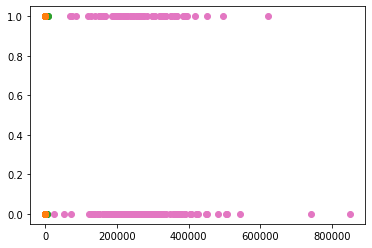

In [10]:
# Before scaling : 
plt.scatter(x_train[["age"]],y_train)
plt.scatter(x_train[["anaemia"]],y_train)
plt.scatter(x_train[["creatinine_phosphokinase_mcg_per_L"]],y_train)
plt.scatter(x_train[["diabetes"]],y_train)
plt.scatter(x_train[["ejection_fraction_percentage"]],y_train)
plt.scatter(x_train[["high_blood_pressure"]],y_train)
plt.scatter(x_train[["platelets_kiloplatelets_per_mL"]],y_train)
plt.scatter(x_train[["serum_creatinine_mg_per_dL"]],y_train)
plt.scatter(x_train[["serum_sodium_mEq_per_L"]],y_train)
plt.scatter(x_train[["sex"]],y_train)
plt.scatter(x_train[["smoking"]],y_train)
plt.scatter(x_train[["Care_Time_Days"]],y_train)
plt.show()

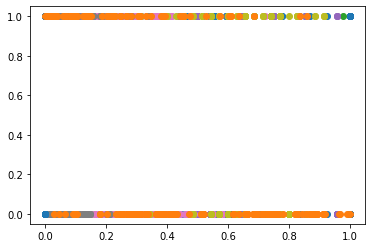

In [11]:
# After scaling : 
plt.scatter(x_train_norm[:,0],y_train)
plt.scatter(x_train_norm[:,1],y_train)
plt.scatter(x_train_norm[:,2],y_train)
plt.scatter(x_train_norm[:,3],y_train)
plt.scatter(x_train_norm[:,4],y_train)
plt.scatter(x_train_norm[:,5],y_train)
plt.scatter(x_train_norm[:,6],y_train)
plt.scatter(x_train_norm[:,7],y_train)
plt.scatter(x_train_norm[:,8],y_train)
plt.scatter(x_train_norm[:,9],y_train)
plt.scatter(x_train_norm[:,10],y_train)
plt.scatter(x_train_norm[:,11],y_train)
plt.show()

#  - Using classification ML models algorithms ( KNN, NB, SVM ) : 

#  - Model1 ( KNN ) :

In [12]:
model1 = KNeighborsClassifier(n_neighbors=5)  # by default ---> 5
model1.fit(x_train_norm,y_train)
y_model1_norm = model1.predict(x_test_norm)
error1_accuracy = mc.accuracy_score(y_test,y_model1_norm)
print("accuracy : ",error1_accuracy)
error1_mean_squared = mc.mean_squared_error(y_test,y_model1_norm)
print("mean_squared_error: ",error1_mean_squared)

accuracy :  0.7
mean_squared_error:  0.3


c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#  - Model2 ( NB ) : 

In [13]:
model2 = GaussianNB()  
model2.fit(x_train_norm,y_train)
y_model2_norm = model2.predict(x_test_norm)
error2_accuracy = mc.accuracy_score(y_test,y_model2_norm)
print("accuracy : ",error2_accuracy)
error2_mean_squared = mc.mean_squared_error(y_test,y_model2_norm)
print("mean_squared_error: ",error2_mean_squared)

c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


accuracy :  0.7333333333333333
mean_squared_error:  0.26666666666666666


# Model3 ( SVM ) :

#  - kernel = "linear"

In [14]:
model3 = svm.SVC(kernel="linear")
model3.fit(x_train_norm,y_train)
y_model3_norm = model3.predict(x_test_norm)
error3_accuracy = mc.accuracy_score(y_test,y_model3_norm)
print("accuracy : ",error3_accuracy)
error3_mean_squared = mc.mean_squared_error(y_test,y_model3_norm)
print("mean_squared_error: ",error3_mean_squared)

accuracy :  0.8333333333333334
mean_squared_error:  0.16666666666666666


c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Model4 ( SVM ) :

# - kernel = "poly"

In [15]:
model4 = svm.SVC(kernel="poly",degree=4)
model4.fit(x_train_norm,y_train)
y_model4_norm = model4.predict(x_test_norm)
error4_accuracy = mc.accuracy_score(y_test,y_model4_norm)
print("accuracy : ",error4_accuracy)
error4_mean_squared = mc.mean_squared_error(y_test,y_model4_norm)
print("mean_squared_error: ",error4_mean_squared)

accuracy :  0.7333333333333333
mean_squared_error:  0.26666666666666666


c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The accuracy of models: 
    - model1_(KNN) ---> 70%, 
    - model2_(NB) ---> 73.3%, 
    - model3_(SVM_linear) ---> 83.3%, 
    - model4_(SVM_poly) ---> 73.3% .

So, The project will depend on the model3 

# Try model_3 on the test_data :-

In [18]:
y_model3_norm = pd.DataFrame(y_model3_norm) 
y_model3_norm.columns = ["y_model3_norm"]
y_model3_norm.index = y_test.index
concate_data = pd.concat([y_test,y_model3_norm],axis=1)
concate_data

,DEATH_EVENT,y_model3_norm
206,0,0
188,0,0
12,1,1
219,0,0
237,0,0
136,0,0
228,0,0
205,0,0
52,1,1
108,0,0


In [27]:
print("The actual no.of death = ",len(concate_data.DEATH_EVENT[concate_data.DEATH_EVENT==1]))
print("The model_3 no.of death = ",len(concate_data.y_model3_norm[concate_data.y_model3_norm==1]))

The actual no.of death =  23
The model_3 no.of death =  17
